**Created by Gael AHOUANVOEDO**

**🚀 Soccer Database 📊 Udacicty Data Analyst NanoDegree 📈**

**10 June 2022**

# **<center><span style="color:#fd7b12;">🚀 SOCCER DATABASE 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analysis](#4)
- [5. Conclusion](#5)
- [6. Limitation](#6)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### **In this project I will have to exploit a database on football and get information out of it using pandas and numpy**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;">Data Wrangling </span></center>**

## <span style="color:#e76f51;"> Data wrangling approach </span>

### I opted to process each of the database tables one after the other. For tables having common variables, I used pandas merge function to link them together. For long tables like the matches table, I reduced the number of columns as much as possible to have an easily observable and exploitable data set.

### The process steps are:
- import the table from the database
- define its size and the number of missing values
- merge common variables with other tables
- remove useless or redundant variables
- rearrange the columns for better reading

### We will create a connection to be able to connect to our SQL database. At the end of the project We should remember to OFF the connection. For import the datas we will use SELECT * FROM

In [2]:
con = sqlite3.connect("database.sqlite")
country = pd.read_sql_query("SELECT * from Country", con)
league = pd.read_sql_query("SELECT * from League", con)
match = pd.read_sql_query("SELECT * from Match", con)
player = pd.read_sql_query("SELECT * from Player", con)
player_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
team = pd.read_sql_query("SELECT * from Team", con)
team_attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
con.close()

### In the following we will study the dataset one by one to check if they are well imported so as not to get tangled up in the consistency of the work

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Country Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>2 columns </u></b>and <b><u>11  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>22 observation</u></b> with <b><u>0 missing values</u></b>.</i><br>

### We will define a function that will allow us to have the information about the shape of our dataest to avoid repetitive code

In [3]:
def dataset_info(df):
    print(f'\033[94mNumber of rows in the dataset: {df.shape[0]}')
    print(f'\033[94mNumber of columns in the dataseta: {df.shape[1]}')
    print(f'\033[94mNumber of values in the dataset: {df.count().sum()}')
    print(f'\033[94mNumber missing values in the dataset: {sum(df.isna().sum())}')

In [4]:
country.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [5]:
dataset_info(country)

Number of rows in the dataset: 11
Number of columns in the dataseta: 2
Number of values in the dataset: 22
Number missing values in the dataset: 0


### We cannot currently do any study on this dataset

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA League Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>3 columns </u></b>and <b><u>11  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>33 observations</u></b> with <b><u>0 missing values</u></b>.</i><br>

In [6]:
league.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [7]:
dataset_info(league)

Number of rows in the dataset: 11
Number of columns in the dataseta: 3
Number of values in the dataset: 33
Number missing values in the dataset: 0


### We have the ID of the countries in the league dataset, it would then be necessary to merge the countries corresponding to the IDs to our datatset with Country Dataset

In [8]:
country.rename(columns={'name':'country'}, inplace=True)
league = league.merge(country, how='inner', on= 'id' )
league.drop('country_id', axis=1,inplace=True)
league.head(3)

,id,name,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France


### It would be useful to know now how many leagues our dataset offers us

In [9]:
league.nunique()

id         11
name       11
country    11
dtype: int64

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Team Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>5 columns </u></b>and <b><u>299  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>1484 observations</u></b> with <b><u>11 missing values</u></b>.</i><br>

In [10]:
team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [11]:
dataset_info(team)

Number of rows in the dataset: 299
Number of columns in the dataseta: 5
Number of values in the dataset: 1484
Number missing values in the dataset: 11


In [12]:
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

### We can't make any study with this dataset now. Just remember that for future merging, team_api_id is more complete than team_fifa_api_id

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Match Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>115 columns </u></b>and <b><u>25979  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>2580190 observations</u></b> with <b><u>407395 missing values</u></b>.</i><br>

In [13]:
match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [14]:
dataset_info(match)

Number of rows in the dataset: 25979
Number of columns in the dataseta: 115
Number of values in the dataset: 2580190
Number missing values in the dataset: 407395


### Our dataset is too big, it will be better to risize it by remove all unnecessary columns : redundant information, missing values, feature that give unimportant data... 

### Drop ID columns and Date. They will not be usefull for our study

In [15]:
match.drop(['id','country_id','match_api_id','date'],axis=1,inplace=True)

In [16]:
match.head(1)

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,2008/2009,1,9987,9993,1,1,NaN,NaN,NaN,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


### They are successuffly remove. Now we will find all features that have more than 0.34 (1/3) missing values and remove them also. The ratio of missing data is to important to make our study

In [17]:
null = pd.DataFrame(match.isnull().sum()/len(match),columns=['count'])

In [18]:
null_drop = null.query('count > 0.34')

In [19]:
null_drop.index

Index(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD',
       'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

In [20]:
match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner','possession', 'PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD','GBA', 'BSH', 'BSD', 'BSA'],axis=1,inplace=True)

In [21]:
match.head(1)

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,1,2008/2009,1,9987,9993,1,1,NaN,NaN,NaN,...,3.5,1.8,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5


### We go from 115 to 91 columns.Observe the remaining columns, and identify which are not usefull to answer questions.

In [22]:
match.columns

Index(['league_id', 'season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_

### We can delete all player features because we don't want to use them to make our analysis

In [23]:
match.drop(['home_player_X1', 'home_player_X2', 'home_player_X3','home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7','home_player_X8', 'home_player_X9', 'home_player_X10','home_player_X11'],axis=1,inplace=True)
match.drop(['away_player_X1', 'away_player_X2', 'away_player_X3','away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7','away_player_X8', 'away_player_X9', 'away_player_X10','away_player_X11'],axis=1,inplace=True)

In [24]:
match.drop(['home_player_Y1', 'home_player_Y2', 'home_player_Y3','home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7','home_player_Y8', 'home_player_Y9', 'home_player_Y10','home_player_Y11'],axis=1,inplace=True)
match.drop(['away_player_Y1', 'away_player_Y2', 'away_player_Y3','away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7','away_player_Y8', 'away_player_Y9', 'away_player_Y10','away_player_Y11'],axis=1,inplace=True)

In [25]:
match.drop(['home_player_1', 'home_player_2', 'home_player_3','home_player_4', 'home_player_5', 'home_player_6', 'home_player_7','home_player_8', 'home_player_9', 'home_player_10','home_player_11'],axis=1,inplace=True)
match.drop(['away_player_1', 'away_player_2', 'away_player_3','away_player_4', 'away_player_5', 'away_player_6', 'away_player_7','away_player_8', 'away_player_9', 'away_player_10','away_player_11'],axis=1,inplace=True)

In [26]:
match.columns

Index(['league_id', 'season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA'],
      dtype='object')

### We still have many columns. Most of them is about betting. We will fix it after

In [27]:
match.head(3)

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,1,2008/2009,1,9987,9993,1,1,1.73,3.4,5.00,...,3.5,1.8,3.3,3.75,1.70,3.30,4.33,1.65,3.40,4.50
1,1,2008/2009,1,10000,9994,0,0,1.95,3.2,3.60,...,3.5,1.9,3.2,3.50,1.83,3.30,3.60,2.00,3.25,3.25
2,1,2008/2009,1,9984,8635,0,3,2.38,3.3,2.75,...,2.3,2.5,3.2,2.50,2.50,3.25,2.40,2.35,3.25,2.65


### To better understand our dataset we will merge informations taken from the other dataset that would be useful

In [28]:
league.rename(columns={'id':'league_id'}, inplace=True)
match = match.merge(league, how='inner', on= 'league_id' )
match.drop(['league_id','country'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,1.8,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League


In [29]:
match.columns

Index(['season', 'stage', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'name'],
      dtype='object')

In [30]:
team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [31]:
team.rename(columns={'team_api_id':'home_team_api_id'}, inplace=True)
match = match.merge(team, how='inner', on= 'home_team_api_id' )
match.drop(['id', 'team_fifa_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name,team_long_name
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,3.3,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League,KRC Genk


In [32]:
team.rename(columns={'home_team_api_id':'away_team_api_id'}, inplace=True)
match = match.merge(team, how='inner', on= 'away_team_api_id' )
match.drop(['id', 'team_fifa_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1,inplace=True)
match.head(1)

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,...,LBA,WHH,WHD,WHA,VCH,VCD,VCA,name,team_long_name_x,team_long_name_y
0,2008/2009,1,9987,9993,1,1,1.73,3.4,5.0,1.75,...,3.75,1.7,3.3,4.33,1.65,3.4,4.5,Belgium Jupiler League,KRC Genk,Beerschot AC


In [33]:
match.drop([ 'home_team_api_id', 'away_team_api_id'], axis=1,inplace=True)

### It's done! Now we will just keeep one bet predict and remove all others

In [34]:
match.columns

Index(['season', 'stage', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'name', 'team_long_name_x',
       'team_long_name_y'],
      dtype='object')

In [35]:
match.drop([ 'B365H', 'B365D','B365A','IWH', 'IWD', 'IWA', 'LBH','LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA'], axis=1,inplace=True)

In [36]:
match.head(1)

,season,stage,home_team_goal,away_team_goal,BWH,BWD,BWA,name,team_long_name_x,team_long_name_y
0,2008/2009,1,1,1,1.75,3.35,4.2,Belgium Jupiler League,KRC Genk,Beerschot AC


### Going from 115 to 10 columns

In [37]:
match.columns

Index(['season', 'stage', 'home_team_goal', 'away_team_goal', 'BWH', 'BWD',
       'BWA', 'name', 'team_long_name_x', 'team_long_name_y'],
      dtype='object')

In [38]:
match.rename(columns = {'stage':'journey', 'home_team_goal':'HTG', 'away_team_goal':'ATG','name':'league', 'team_long_name_x':'home_team', 'team_long_name_y':'away_team'},inplace=True)

In [39]:
match.head(1)

,season,journey,HTG,ATG,BWH,BWD,BWA,league,home_team,away_team
0,2008/2009,1,1,1,1.75,3.35,4.2,Belgium Jupiler League,KRC Genk,Beerschot AC


In [40]:
match = match.reindex(columns=['season','journey','league','home_team','away_team','HTG','ATG', 'BWH', 'BWD', 'BWA'])

In [41]:
match.head(5)

,season,journey,league,home_team,away_team,HTG,ATG,BWH,BWD,BWA
0,2008/2009,1,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1.75,3.35,4.20
1,2009/2010,5,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,1.80,3.40,3.95
2,2010/2011,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2,1,1.91,3.30,3.70
3,2011/2012,1,Belgium Jupiler League,KRC Genk,Beerschot AC,3,1,1.45,3.95,6.25
4,2012/2013,11,Belgium Jupiler League,KRC Genk,Beerschot AC,3,0,1.50,4.00,5.50


### Now that our dataset is ready. We can answer to questions

### `How many games do you play in a season?`

In [42]:
match.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2014/2015', '2015/2016', '2013/2014'], dtype=object)

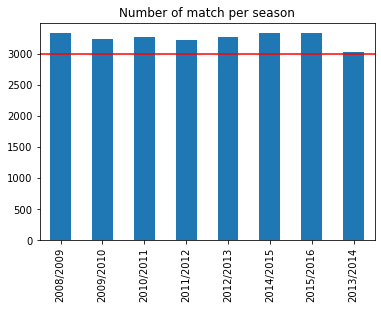

In [43]:
plt.figure()
match.season.value_counts(sort=False).plot(kind='bar')
plt.title('Number of match per season')
plt.axhline(y=3000, color='r', linestyle='-')

### It is noted that each season, at least 3000 matches have been played since 2008. Our red line on 3000 is touch by each bar

### `Which league plays the most matches and which plays the least?`

Text(0.5, 1.0, 'Number of match per season')

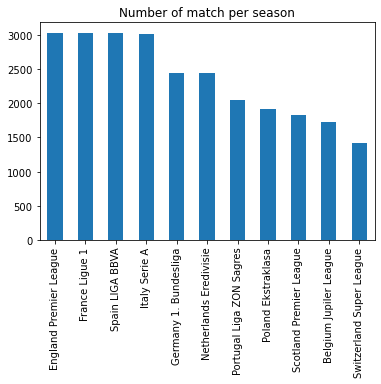

In [44]:
plt.figure()
match.league.value_counts(sort=True).plot(kind='bar')
plt.title('Number of match per season')

### The championship where we play the most is the English championship and the one where we play the least is the Swiss championship

### `Of the home and away teams, who scores the most on average?`

In [45]:
match.HTG.describe()

count    25979.000000
mean         1.544594
std          1.297158
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: HTG, dtype: float64

In [46]:
match.ATG.describe()

count    25979.000000
mean         1.160938
std          1.142110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: ATG, dtype: float64

### Home teams tend to score more goals than away teams. They mean is 1.54 and for away team 1.16

### `In what direction do the predictions of bookmakers in general go?`

In [47]:
BET = pd.DataFrame([match.BWH.mean(),match.BWA.mean(),match.BWD.mean()], columns=['value'], index= ['Home Team Win','Away Team Win','Draw'])
BET.head()

,value
Home Team Win,2.559245
Away Team Win,4.396949
Draw,3.747597


### Among bookmakers the tendency is much more to designate the winning home team or to predict a draw. The mean of value of winning team win bet is the smaller in our tab. In betting, smaller value have de best probability to outcome.

### `Which teams have played every game since recording started in england?`

In [48]:
england_league = match.query('league=="England Premier League"')
england_league.head(3)

,season,journey,league,home_team,away_team,HTG,ATG,BWH,BWD,BWA
1728,2008/2009,1,England Premier League,Manchester United,Newcastle United,1,1,1.30,4.75,8.25
1729,2010/2011,1,England Premier League,Manchester United,Newcastle United,3,0,1.22,5.50,12.50
1730,2011/2012,13,England Premier League,Manchester United,Newcastle United,1,1,1.37,4.60,8.25


In [49]:
england_league_team = england_league.home_team.append(england_league.away_team)

In [50]:
max = len(england_league.season.unique())*38
print(max)

304


In [51]:
england_league_team.value_counts().head(11)

Manchester United       304
Liverpool               304
Sunderland              304
Arsenal                 304
Aston Villa             304
Everton                 304
Manchester City         304
Tottenham Hotspur       304
Chelsea                 304
Stoke City              304
West Bromwich Albion    266
dtype: int64

###  The teams having played all the matches since the beginning of the recording are : Manchester United, Liverpool, Sunderland, Arsenal, Aston Villa, Everton, Manchester City, Tottenham Hotspur, Chelsea, Stoke City. For 304 possible matches.

### `Which team has scored the most goals?`

In [52]:
match.query('home_team== "Manchester United"').HTG.sum()+match.query('away_team== "Manchester United"').ATG.sum()

582

In [53]:
match.query('home_team== "Liverpool"').HTG.sum()+match.query('away_team== "Liverpool"').ATG.sum()

531

In [54]:
match.query('home_team== "Arsenal"').HTG.sum()+match.query('away_team== "Arsenal"').ATG.sum()

573

In [55]:
match.query('home_team== "Manchester City"').HTG.sum()+match.query('away_team== "Manchester City"').ATG.sum()

606

In [56]:
match.query('home_team== "Chelsea"').HTG.sum()+match.query('away_team== "Chelsea"').ATG.sum()

583

### **Manchester City is the team that has scored the most goals over the period. The sum off they home and away goals is more than the oders**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Player Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>7 columns </u></b>and <b><u>11060  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>77420 observations</u></b> with <b><u>0 missing values</u></b>.</i><br>

In [57]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [58]:
dataset_info(player)

Number of rows in the dataset: 11060
Number of columns in the dataseta: 7
Number of values in the dataset: 77420
Number missing values in the dataset: 0


### `What are the physical characteristics recommended to be a footballer?`

### Here, we will observe the distribution of physical caracteristics of the player and determine the best range that specify the common characteristics

In [59]:
player.height.describe()

count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

Text(0.5, 1.0, 'Player Height Distribution')

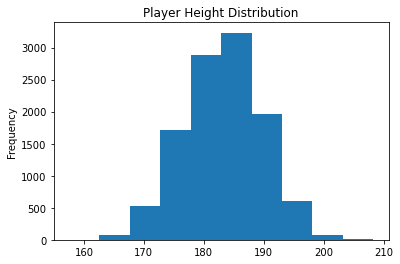

In [60]:
plt.figure()
player.height.plot(kind='hist')
plt.title('Player Height Distribution')

### **The distribution is skewed to the left with most values falling between 177 and 185. It is recommended that a player have a height located within this set.**

In [61]:
player.weight.describe()

count    11060.000000
mean       168.380289
std         14.990217
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

Text(0.5, 1.0, 'Player Weight Distribution')

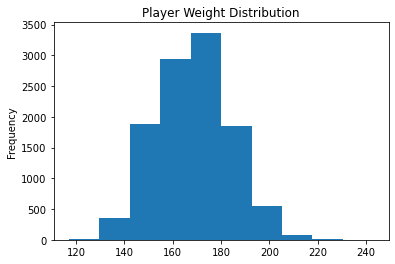

In [62]:
player.weight.plot(kind='hist')
plt.title('Player Weight Distribution')

### The distribution is skewed to the right with most values falling between 159 and 179. It is recommended that a player have a weight located within this set.

### So,The physical characteristics recommended to be a footballer are :
### Height : [177 - 185] and Weight : [159 - 179]

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Player Attributes Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>42 columns </u></b>and <b><u>183978  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>7679775 observations</u></b> with <b><u>47301 missing values</u></b>.</i><br>

In [63]:
player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [64]:
dataset_info(player_attributes)

Number of rows in the dataset: 183978
Number of columns in the dataseta: 42
Number of values in the dataset: 7679775
Number missing values in the dataset: 47301


### To have players name we have to merge Player Dataset with Player Attributes

In [65]:
player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [66]:
player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [67]:
player_attributes = player_attributes.merge(player,how='inner', on='player_api_id')
player_attributes.drop(['player_api_id', 'birthday','height', 'weight','id_y','player_fifa_api_id_y'],axis=1,inplace=True)
player_attributes.head(3)

,id_x,player_fifa_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name
0,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye


In [68]:
player_attributes.columns

Index(['id_x', 'player_fifa_api_id_x', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'player_name'],
      dtype='object')

In [69]:
player_attributes = player_attributes[['id_x', 'player_fifa_api_id_x', 'player_name','date', 'overall_rating', 'potential','preferred_foot', 'attacking_work_rate', 'defensive_work_rate','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling', 'curve', 'free_kick_accuracy', 'long_passing','ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 'penalties','marking', 'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]
player_attributes.head(2)

,id_x,player_fifa_api_id_x,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [70]:
player_attributes.columns

Index(['id_x', 'player_fifa_api_id_x', 'player_name', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [71]:
player_attributes.drop(['id_x','player_fifa_api_id_x'],axis=1, inplace=True)

### For have the last player attributes we have to retrieve the years from the date. And create a database that only have the last year attributes

In [72]:
player_attributes.date = player_attributes.date.str[:4]

In [73]:
player_attributes.head(2)

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [74]:
player_attributes_2016 = player_attributes.query('date=="2016"')
player_attributes_2016.head()

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,Aaron Cresswell,2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,Aaron Cresswell,2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,Aaron Cresswell,2016,73.0,75.0,left,high,medium,79.0,52.0,57.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,Aaron Doran,2016,65.0,67.0,right,medium,medium,64.0,58.0,60.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0


### `Who is the best player right now in the database?`

In [75]:
player_attributes_2016.query('overall_rating==overall_rating.max()')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
109033,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
109034,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
109035,Manuel Neuer,2016,90.0,90.0,right,medium,medium,15.0,13.0,25.0,...,70.0,37.0,10.0,10.0,11.0,85.0,87.0,91.0,90.0,87.0
131464,Neymar,2016,90.0,94.0,right,high,medium,72.0,88.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
131465,Neymar,2016,90.0,94.0,right,high,medium,72.0,89.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


### In our dataset, the best players are Neuer and Neymar

### `Who is the best potential right now in the database?`

In [76]:
player_attributes_2016.query('potential==potential.max()')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
131464,Neymar,2016,90.0,94.0,right,high,medium,72.0,88.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
131465,Neymar,2016,90.0,94.0,right,high,medium,72.0,89.0,62.0,...,79.0,81.0,21.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


### In our dataset, the best potential is Neymar

### `A club wants to recruit an attacking player who is also involved in defensive play and who has a very good level. who would you advise?`

In [77]:
player_attributes_2016.query('attacking_work_rate=="high" &defensive_work_rate=="high" & overall_rating >85 ')

,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
8485,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,83.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8486,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,84.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8487,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,85.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
8488,Alexis Sanchez,2016,86.0,87.0,right,high,high,77.0,85.0,65.0,...,78.0,77.0,30.0,39.0,35.0,10.0,10.0,15.0,12.0,13.0
19614,Bastian Schweinsteiger,2016,86.0,86.0,right,high,high,79.0,76.0,79.0,...,86.0,83.0,68.0,78.0,76.0,14.0,14.0,13.0,13.0,11.0
26301,Carlos Tevez,2016,86.0,86.0,right,high,high,73.0,88.0,60.0,...,80.0,82.0,39.0,51.0,51.0,4.0,2.0,3.0,2.0,4.0
170797,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,82.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0
170798,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,90.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0
170799,Thomas Mueller,2016,86.0,88.0,right,high,high,79.0,89.0,82.0,...,85.0,90.0,32.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0


### **The players who best match the request are : Alexis Sanchez, Bastian Schweinsteiger, Calos Tevez, Thomas Mueller. They have high attacking and defending work and they overall rating is more than 85**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> EDA Team attributes Dataset </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>

* <i> There are total of <b><u>40 columns </u></b>and <b><u>183978  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>7311819 observations</u></b> with <b><u>47301 missing values</u></b>.</i><br>

In [78]:
team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [79]:
dataset_info(team_attributes)

Number of rows in the dataset: 1458
Number of columns in the dataseta: 25
Number of values in the dataset: 35481
Number missing values in the dataset: 969


### We have to merge Team dataset with Team Attributes dataset for have the team name next to they attibutes

In [80]:
team_attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [81]:
team.columns

Index(['id', 'away_team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [82]:
team_attributes = team_attributes.merge(team,how='inner', on='team_fifa_api_id')
team_attributes.drop(['id_y', 'away_team_api_id', 'team_short_name','id_x','team_fifa_api_id','team_api_id'],axis=1,inplace=True)
team_attributes.head(5)

,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name
0,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen


In [83]:
team_attributes.columns

Index(['date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass', 'team_long_name'],
      dtype='object')

In [84]:
team_attributes = team_attributes[['team_long_name','date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass','buildUpPlayDribbling', 'buildUpPlayDribblingClass','buildUpPlayPassing', 'buildUpPlayPassingClass','buildUpPlayPositioningClass', 'chanceCreationPassing','chanceCreationPassingClass', 'chanceCreationCrossing','chanceCreationCrossingClass', 'chanceCreationShooting','chanceCreationShootingClass', 'chanceCreationPositioningClass','defencePressure', 'defencePressureClass', 'defenceAggression','defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass','defenceDefenderLineClass', ]]

In [85]:
team_attributes.date = team_attributes.date.str[:4]

In [86]:
team_attributes.date.unique()

array(['2010', '2014', '2015', '2011', '2012', '2013'], dtype=object)

In [87]:
team_attributes_2015 = team_attributes.query('date=="2015"')
team_attributes_2015.head()

,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
2,FC Aarau,2015,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
8,Aberdeen,2015,59,Balanced,64.0,Normal,53,Mixed,Organised,51,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
14,AC Ajaccio,2015,59,Balanced,57.0,Normal,52,Mixed,Organised,48,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
20,Milan,2015,48,Balanced,70.0,Lots,52,Mixed,Organised,66,...,69,Lots,Organised,58,Medium,57,Press,49,Normal,Cover
26,Académica de Coimbra,2015,53,Balanced,53.0,Normal,44,Mixed,Organised,55,...,60,Normal,Organised,39,Medium,38,Press,61,Normal,Cover


In [88]:
team_attributes_2015.drop(['buildUpPlaySpeedClass','buildUpPlayDribblingClass', 'buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'chanceCreationPositioningClass','defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass','defenceDefenderLineClass', ],axis=1,inplace=True)

In [89]:
team_attributes_2015.head(5)

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
2,FC Aarau,2015,47,41.0,54,54,63,64,47,44,54
8,Aberdeen,2015,59,64.0,53,51,72,63,49,45,63
14,AC Ajaccio,2015,59,57.0,52,48,38,52,38,47,53
20,Milan,2015,48,70.0,52,66,36,69,58,57,49
26,Académica de Coimbra,2015,53,53.0,44,55,51,60,39,38,61


In [90]:
team_attributes_2015.buildUpPlayPassing.isnull().sum()

0

In [91]:
team_attributes_2015.chanceCreationPassing.isnull().sum()

0

In [92]:
team_attributes_2015['generalPassing'] = team_attributes_2015['chanceCreationPassing']+team_attributes_2015['chanceCreationPassing']
team_attributes_2015['generalPassing'] = team_attributes_2015['generalPassing']/2

In [93]:
team_attributes_2015.head(5)

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,generalPassing
2,FC Aarau,2015,47,41.0,54,54,63,64,47,44,54,54.0
8,Aberdeen,2015,59,64.0,53,51,72,63,49,45,63,51.0
14,AC Ajaccio,2015,59,57.0,52,48,38,52,38,47,53,48.0
20,Milan,2015,48,70.0,52,66,36,69,58,57,49,66.0
26,Académica de Coimbra,2015,53,53.0,44,55,51,60,39,38,61,55.0


### `A player wants to play in the club that has the best passing game, which club would you recommend?`

In [94]:
team_attributes_2015.query('generalPassing==generalPassing.max()')

,team_long_name,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,generalPassing
141,Bayer 04 Leverkusen,2015,73,29.0,55,77,54,61,61,72,50,77.0
171,Birmingham City,2015,56,32.0,75,77,62,64,42,47,54,77.0


### I would advise him to sign for Bayer Leverkusen or Birmigham

In [95]:
con.close()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#fd7b12;">Conclusion  </span></center>**

### `How many games do you play in a season?`

### It is noted that each season, at least 3000 matches have been played since 2008.

### `Which league plays the most matches and which plays the least?`

### The championship where we play the most is the English championship and the one where we play the least is the Swiss championship

### `Of the home and away teams, who scores the most on average?`

### Home teams tend to score more goals than away teams

### `In what direction do the predictions of bookmakers in general go?`

### Among bookmakers the tendency is much more to designate the winning home team or to predict a draw

### `Which teams have played every game since recording started in england?`

### The teams having played all the matches since the beginning of the recording are : Manchester United, Liverpool, Sunderland, Arsenal, Aston Villa, Everton, Manchester City, Tottenham Hotspur, Chelsea, Stoke City

### `Which team has scored the most goals?`

### Manchester City is the team that has scored the most goals over the period

### `What are the physical characteristics recommended to be a footballer?`

### The physical characteristics recommended to be a footballer are ---->
### Height : [177 - 185], Weight : [159 - 179]

### `Who is the best player right now in the database?`

### In our dataset, the best players are Neuer and Neymar

### `Who is the best potential right now in the database?`

### In our dataset, the best potential is Neymar

### `A club wants to recruit an attacking player who is also involved in defensive play and who has a very good level. who would you advise?`

### The players who best match the request are : Alexis Sanchez, Bastian Schweinsteiger, Calos Tevez, Thomas Mueller

### `A player wants to play in the club that has the best passing game, which club would you recommend?`

### I would advise him to sign for Bayer Leverkusen or Birmigham

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;">Limitation  </span></center>**

### The limits encountered during operation are:

### There are a lot of columns in tables, for example Match table has 115 columns most of which don't have a proper explanation of what it is.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>